#### Detecting Mail as Spam and Ham
* Using ML Model
* Using Manual mark as 

In [30]:
import pandas as pd
import emoji
import re
from nltk.stem import PorterStemmer , WordNetLemmatizer , LancasterStemmer , SnowballStemmer
from nltk.corpus import stopwords
import autocorrect
from nltk.tokenize import word_tokenize , sent_tokenize

In [4]:
df = pd.read_csv(r"C:\Users\User\Downloads\email_data.csv")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [5]:
df.drop(['Unnamed: 0' , 'label_num'] , axis = 1 , inplace = True)

In [6]:
df

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\nth...
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a..."
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\nthis deal is to ...
...,...,...
5166,ham,Subject: put the 10 on the ft\nthe transport v...
5167,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...
5168,ham,Subject: calpine daily gas nomination\n>\n>\nj...
5169,ham,Subject: industrial worksheets for august 2000...


In [7]:
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

<Axes: xlabel='label'>

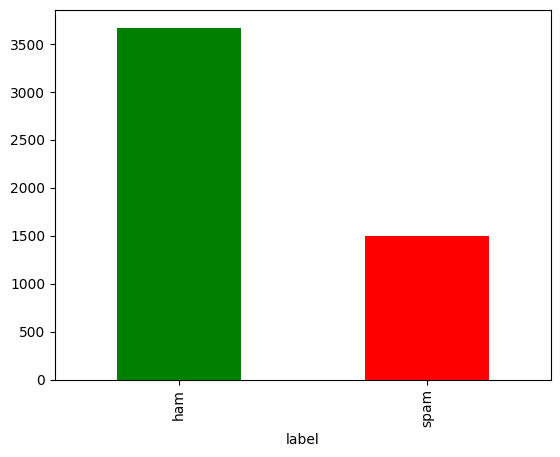

In [10]:
df['label'].value_counts().plot(kind = 'bar' , color = ('green' , 'red'))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df['text']
y = df['label']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size=0.25 , random_state= 23)

Text Preprocessing

In [21]:
def eda(data):
    count = data.apply(lambda x: emoji.emoji_count(x)).sum()
    lower = data.str.islower().sum()
    url = data.apply(lambda x: True if re.search(r'https?:\S+| www.\S+', x) else False).sum()
    tag = data.apply(lambda x: True if re.search(r'<[^>]+>' , x) else False).sum()
    punct = data.apply(lambda x : True if re.search(r'[^a-zA-Z0-9]' , x) else False).sum()
    digit = data.apply(lambda x: True if re.search(r'[0-9]', x) else False).sum()
    
    return pd.Series({'Emoji':count,'Lower_case':lower,"Urls":url,'tags':tag,'punctuation':punct,'digits':digit})

In [22]:
eda(df.text)

Emoji             0
Lower_case        0
Urls            355
tags              0
punctuation    5171
digits         4533
dtype: int64

In [31]:
def text(x):
    spell = autocorrect.Speller()
    porter = PorterStemmer()
    lem = WordNetLemmatizer()
    x = x.lower()
    x = emoji.demojize(x).replace(":","")
    x = re.sub(r'https?:\S+| www.\S+' , ' ' , x)
    x = re.sub(r'<[^>]+>',' ',x)
    x = re.sub(r'[^a-zA-Z0-9]', ' ' , x)
    x = re.sub(r'[0-9]' , ' ', x)
    x = word_tokenize(x)
    x = [porter.stem(i) for i in x]
    x = [lem.lemmatize(i) for i in x]
    x = [i for i in x if i not in stopwords.words('english')]
    return x

In [32]:
X_train.apply(text)

615     [subject, thi, week, onli, f, ree, gen, erlc, ...
1402    [subject, woww, paliourg, believ, thi, incredi...
290     [subject, nom, vol, thru, agre, eileen, ponton...
213     [subject, today, orchard, guei, republ, cote, ...
1055    [subject, tom, moor, jr, follow, convers, seve...
                              ...                        
2998    [subject, juli, nom, daren, plea, see, volum, ...
1993    [subject, enron, year, end, perform, manag, pr...
1064     [subject, neon, week, experienc, god, week, doc]
4838    [subject, possibl, ad, deal, price, path, mana...
595     [subject, nom, actual, flow, agre, nom, forwar...
Name: text, Length: 3878, dtype: object

In [ ]:
X_test.apply(text)

#### selecting model

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [ ]:
log = LogisticRegression
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
accuracy_score(y_pred , y_test)

In [ ]:
knn = KNeighborsClassifier()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
accuracy_score(y_pred , y_test)

In [ ]:
ran = RandomForestClassifier()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
accuracy_score(y_pred , y_test)

In [ ]:
dec = DecisionTreeClassifier()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
accuracy_score(y_pred , y_test)

In [ ]:
gua = GaussianNB()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
accuracy_score(y_pred , y_test)

In [ ]:
lin = LinearSVC()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
accuracy_score(y_pred , y_test)